In [322]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Perceptron

In [323]:
!cd data && wget -O time_series_19-covid-Confirmed.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv && wget -time_series_19-covid-Deaths.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Deaths.csv && wget -O time_series_19-covid-Recovered.csv https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Recovered.csv

--2020-03-14 04:32:49--  https://data.humdata.org/hxlproxy/api/data-preview.csv?url=https%3A%2F%2Fraw.githubusercontent.com%2FCSSEGISandData%2FCOVID-19%2Fmaster%2Fcsse_covid_19_data%2Fcsse_covid_19_time_series%2Ftime_series_19-covid-Confirmed.csv
Resolving data.humdata.org (data.humdata.org)... 162.249.108.156
Connecting to data.humdata.org (data.humdata.org)|162.249.108.156|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘time_series_19-covid-Confirmed.csv’

time_series_19-covi     [  <=>               ]  61.16K   250KB/s    in 0.2s    

2020-03-14 04:32:49 (250 KB/s) - ‘time_series_19-covid-Confirmed.csv’ saved [62630]

wget: --tries: Invalid number ‘ime_series_19-covid-Deaths.csv’.


In [324]:
!ls data

COVID-19			    time_series_2019-ncov-Deaths.csv
covid_19_clean_complete.csv	    time_series_2019-ncov-Recovered.csv
time_series_19-covid-Confirmed.csv


In [325]:
import os

datasets = []
for f in os.listdir('data'):
    if '.csv' in f:
        print(f)
        dataset = pd.read_csv(f'data/{f}')
        datasets.append(dataset)

covid_19_clean_complete.csv
time_series_19-covid-Confirmed.csv
time_series_2019-ncov-Deaths.csv
time_series_2019-ncov-Recovered.csv


<h1>Confirmed</h1>

In [326]:
confirmed = datasets[1]
confirmed.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
count,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,...,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000,421.000000
mean,33.648870,-38.916934,1.318290,1.551069,2.235154,3.406176,5.030879,6.952494,13.249406,14.646081,...,225.938242,232.498812,241.767221,251.356295,260.795724,269.741093,281.691211,298.966746,304.852732,344.876485
std,17.309566,81.833728,21.691964,21.779313,27.126762,37.768516,52.794900,71.142530,174.400407,175.525661,...,3299.730019,3311.155563,3325.182995,3339.307648,3352.704167,3368.494014,3381.614282,3408.577794,3416.666238,3492.127411
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.791700,-95.814300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.502500,-76.872100,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,42.368900,19.503300,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,2.000000,2.000000,3.000000,5.000000,7.000000,8.000000,11.000000,13.000000,19.000000,28.000000
max,64.963100,174.886000,444.000000,444.000000,549.000000,761.000000,1058.000000,1423.000000,3554.000000,3554.000000,...,67332.000000,67466.000000,67592.000000,67666.000000,67707.000000,67743.000000,67760.000000,67773.000000,67781.000000,67786.000000


In [327]:
confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20,3/12/20,3/13/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,43,47,48,50,50,50,53,59,70,75
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,331,360,420,461,502,511,581,639,639,701
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,110,117,130,138,150,150,160,178,178,200
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,50,50,83,93,99,117,129,149,149,197


In [328]:
total_confirmed = confirmed.drop(columns=['Lat', 'Long', 'Country/Region']).sum()

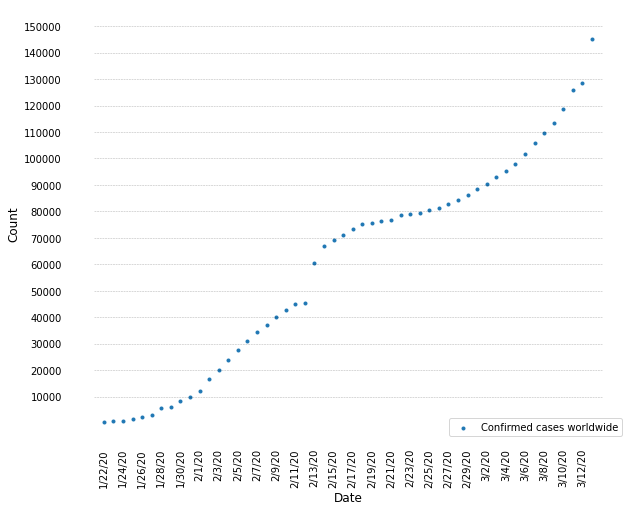

In [329]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[10,8])

# plot the data
plt.scatter(total_confirmed.index, total_confirmed.values, label='Confirmed cases worldwide', marker='.')
plt.legend()

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.yticks(range(10000, 150001, 10000))
plt.xticks(total_confirmed.index[::2],rotation=90,fontsize=10)
for y in range(10000, 150001, 10000):    
    plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

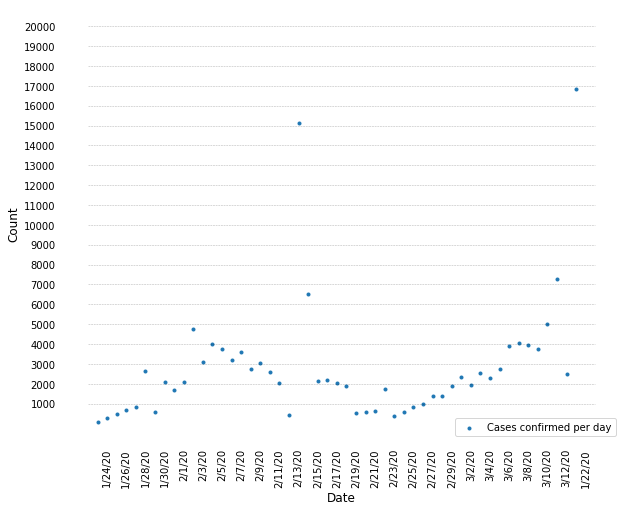

In [331]:
confirmed_per_day = np.diff(total_confirmed)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[10,8])

# plot the data
plt.scatter(total_confirmed.index[1:], confirmed_per_day, label='Cases confirmed per day', marker='.')
plt.legend()

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.yticks(range(1000, 20001, 1000))
plt.xticks(total_confirmed.index[::2],rotation=90,fontsize=10)
for y in range(1000, 20001, 1000):    
    plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

In [332]:
confirmed_by_country = confirmed.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_values(by='3/10/20', ascending=False)

Text(0.5, 1.0, 'Cases confirmed by country')

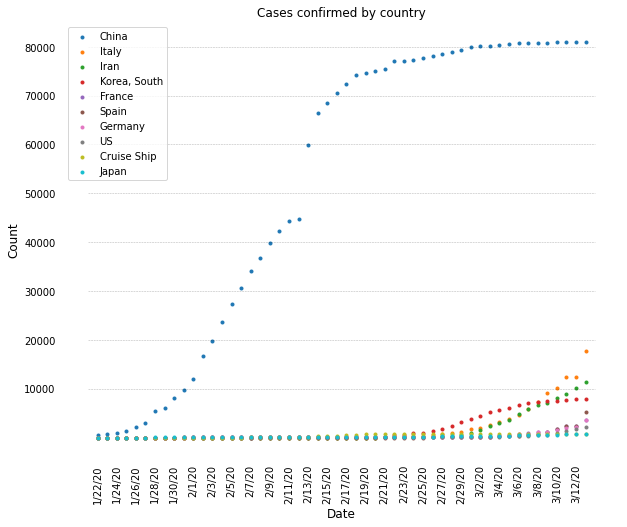

In [333]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[10,8])

# plot the data
for country in confirmed_by_country.index[:10]:
    plt.scatter(confirmed_by_country.columns, confirmed_by_country.loc[country], label=country, marker='.')
plt.legend(loc='upper left')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.yticks(range(10000, 80001, 10000))
plt.xticks(total_confirmed.index[::2],rotation=90,fontsize=10)
for y in range(10000, 80001, 10000):    
    plt.plot([-1,len(total_confirmed.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.title('Cases confirmed by country')

Text(0.5, 1.0, 'Confirmed cases as of 3/10/20')

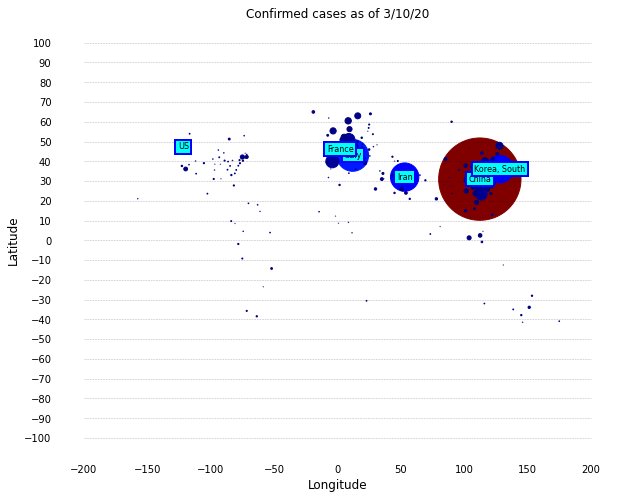

In [334]:
lat_long = confirmed.groupby(by=['Country/Region', 'Lat', 'Long'], as_index=False).sum().sort_values(by='3/10/20', ascending=False)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[10,8])

# plot the data
plt.scatter(lat_long['Long'], lat_long['Lat'], s=lat_long['3/10/20']/10, c=lat_long['3/10/20']/100, cmap=plt.get_cmap("jet"))
for r in (*lat_long.values[:5], lat_long.loc[lat_long['Country/Region'] == 'US'].iloc[0].values):
        bbox_props = dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=2)
        plt.text(r[2], r[1], r[0], ha="center", va="center", rotation=0,
                    size=8,
                    bbox=bbox_props)

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)


plt.yticks(range(-100, 101, 10))
plt.xticks(fontsize=10)
for y in range(-100, 101, 10):    
    plt.plot([-200, 200], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.title('Confirmed cases as of 3/10/20')

<h1>Deaths</h1>

In [336]:
deaths = datasets[2]
deaths.describe()

,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.00000,404.000000,404.000000,...,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,216.000000
mean,33.809671,-17.169430,0.042079,0.044554,0.064356,0.103960,0.138614,0.20297,0.324257,0.329208,...,7.636139,7.821782,8.054455,8.287129,8.564356,8.806931,9.410891,9.871287,10.618812,21.365741
std,16.903461,89.484685,0.845782,0.847120,1.195864,1.991068,2.588502,3.78234,6.219421,6.219958,...,139.497677,141.128096,142.981100,144.628322,146.238591,147.797468,149.909996,151.786265,154.256331,215.665095
min,-41.454500,-157.858400,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,30.617100,-87.161200,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.948100,-71.101900,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,42.168450,70.314000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,64.963100,174.886000,17.000000,17.000000,24.000000,40.000000,52.000000,76.00000,125.000000,125.000000,...,2803.000000,2835.000000,2871.000000,2902.000000,2931.000000,2959.000000,2986.000000,3008.000000,3024.000000,3046.000000


In [337]:
deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/2/20,3/3/20,3/4/20,3/5/20,3/6/20,3/7/20,3/8/20,3/9/20,3/10/20,3/11/20
0,Anhui,Mainland China,31.8257,117.2264,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
1,Beijing,Mainland China,40.1824,116.4142,0,0,0,0,0,1,...,8,8,8,8,8,8,8,8,8,NaN
2,Chongqing,Mainland China,30.0572,107.8740,0,0,0,0,0,0,...,6,6,6,6,6,6,6,6,6,NaN
3,Fujian,Mainland China,26.0789,117.9874,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,NaN
4,Gansu,Mainland China,36.0611,103.8343,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,0.0


In [338]:
total_deaths = deaths.drop(columns=['Lat', 'Long', 'Country/Region']).sum()

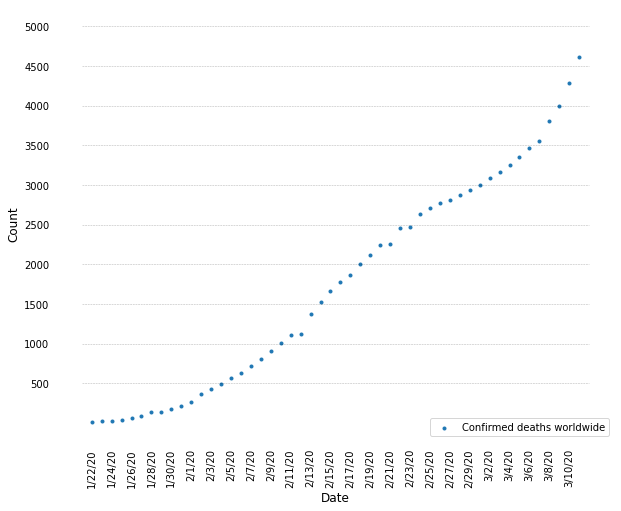

In [339]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[10,8])

# plot the data
plt.scatter(total_deaths.index, total_deaths.values, label='Confirmed deaths worldwide', marker='.')
plt.legend()

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.yticks(range(500, 5001, 500))
plt.xticks(total_deaths.index[::2],rotation=90,fontsize=10)
for y in range(500, 5001, 500):    
    plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

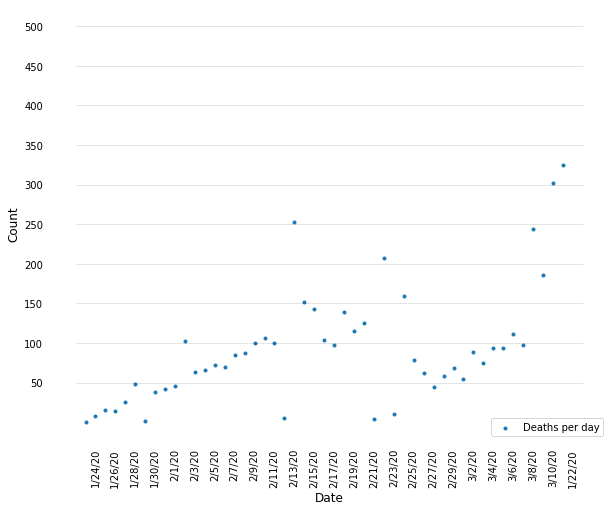

In [340]:
deaths_per_day = np.diff(total_deaths)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[10,8])

# plot the data
plt.scatter(total_deaths.index[1:], deaths_per_day, label='Deaths per day', marker='.')
plt.legend()

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.yticks(range(50, 501, 50))
plt.xticks(total_deaths.index[::2],rotation=90,fontsize=10)
for y in range(50, 501, 50):    
    plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  

In [341]:
deaths_by_country = deaths.drop(columns=['Lat', 'Long']).groupby('Country/Region').sum().sort_values(by='3/10/20', ascending=False)

Text(0.5, 1.0, 'Deaths by country')

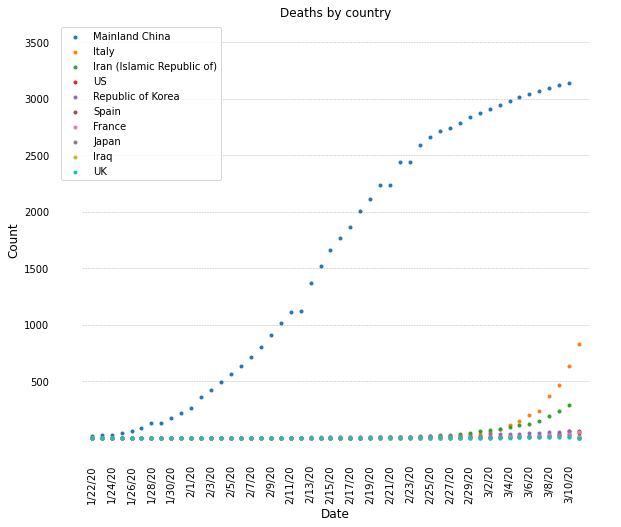

In [342]:
# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[10,8])

# plot the data
for country in deaths_by_country.index[:10]:
    plt.scatter(deaths_by_country.columns, deaths_by_country.loc[country], label=country, marker='.')
plt.legend(loc='upper left')

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Date',fontsize=12)
plt.ylabel('Count',fontsize=12)


plt.yticks(range(500, 3501, 500))
plt.xticks(total_deaths.index[::2],rotation=90,fontsize=10)
for y in range(500, 3501, 500):    
    plt.plot([-1,len(total_deaths.index)], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.title('Deaths by country')

Text(0.5, 1.0, 'Confirmed deaths as of 3/10/20')

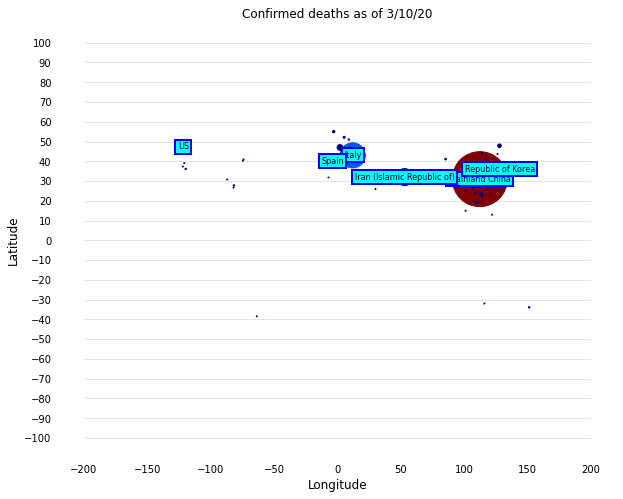

In [343]:
lat_long = deaths.groupby(by=['Country/Region', 'Lat', 'Long'], as_index=False).sum().sort_values(by='3/10/20', ascending=False)

# create figure and axis objects, set figure size
fig, ax = plt.subplots(figsize=[10,8])

# plot the data
plt.scatter(lat_long['Long'], lat_long['Lat'], s=lat_long['3/10/20'], c=lat_long['3/10/20'], cmap=plt.get_cmap("jet"))
for r in (*lat_long.values[:5], lat_long.loc[lat_long['Country/Region'] == 'US'].iloc[0].values):
        bbox_props = dict(boxstyle="square,pad=0.3", fc="cyan", ec="b", lw=2)
        plt.text(r[2], r[1], r[0], ha="center", va="center", rotation=0,
                    size=8,
                    bbox=bbox_props)

# chartjunk clean up
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)  

plt.xlabel('Longitude',fontsize=12)
plt.ylabel('Latitude',fontsize=12)


plt.yticks(range(-100, 101, 10))
plt.xticks(fontsize=10)
for y in range(-100, 101, 10):    
    plt.plot([-200, 200], [y] * 2, "--", lw=0.5, color="black", alpha=0.3)  
plt.tick_params(axis="both", which="both", bottom=False, top=False,    
                labelbottom=True, left=False, right=False, labelleft=True)  
plt.title('Confirmed deaths as of 3/10/20')

/home/anthony/projects/corona/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log2
  if sys.path[0] == '':


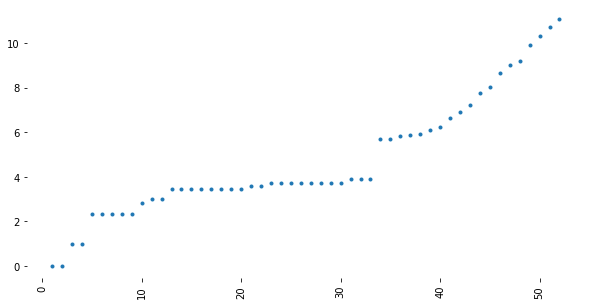

In [344]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
us_cases = confirmed_by_country.loc['US']
us_cases = np.array([0] + list(us_cases[(us_cases) > 0])).reshape(-1, 1)
fig, ax = plt.subplots(figsize=[10,5])
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 
plt.xticks(rotation=90,fontsize=10)
plt.scatter(list(range(len(us_cases))), np.log2(us_cases), marker='.')

In [345]:
X = np.array(range(0, len(us_cases)*24, 24))[1:]
y = np.log2(np.array(us_cases))
y = y[y>= 0]
y = scaler.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y)

/home/anthony/projects/corona/.venv/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log2
  


In [346]:
lin = LinearRegression()
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train.reshape(-1, 1))
lin.fit(X_train_poly, y_train)
y_pred = lin.predict(X_train_poly)

In [347]:
scores = cross_val_score(lin, X_train_poly, y_train, cv=10, scoring='neg_root_mean_squared_error')
-scores.mean()

0.20848049520815648

Text(0.5, 1.0, 'Unconstrained exponential growth')

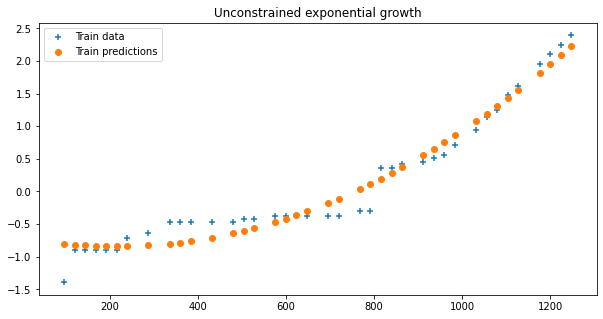

In [353]:
plt.figure(figsize=(10,5))
plt.scatter(X_train, y_train, label='Train data', marker='+')
plt.scatter(X_train, y_pred, label='Train predictions', marker ='o')
plt.legend()
plt.title('Unconstrained exponential growth')

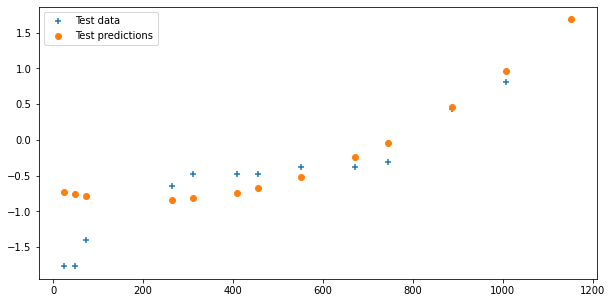

In [354]:
X_test_poly = poly.fit_transform(X_test.reshape(-1, 1))
pred = lin.predict(X_test_poly)
plt.figure(figsize=(10,5))
plt.scatter(X_test, y_test, label='Test data', marker='+')
plt.scatter(X_test, pred, label='Test predictions', marker ='o')
plt.legend()

In [355]:
mean_squared_error(y_test, pred)

0.2202888409958674